In [27]:
import random

import matplotlib.finance as mpf
import matplotlib.pyplot as plt
import pandas
from matplotlib.dates import date2num

df = pandas.read_csv('DAT_MT_EURUSD_M1_201710.csv',
                     names=['date', 'time', 'o', 'h', 'l', 'c', 'v'],
                     parse_dates={'datetime': ['date', 'time']},
                     )  # type DataFrame
df.index = df['datetime']
df['d'] = df.index.map(date2num)

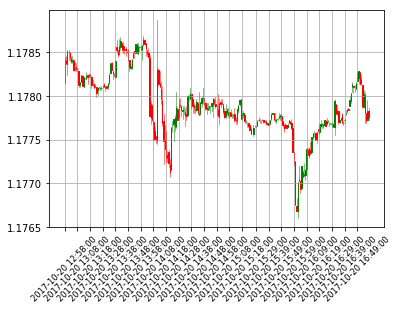

In [11]:
# df = df[-240:]
plt.grid()
plt.xticks(df['d'][::10], df.index[::10], rotation=45, size='small')
ax = plt.subplot()
# y軸のオフセット表示を無効にする。
ax.get_yaxis().get_major_formatter().set_useOffset(False)
data = df[['d', 'o', 'h', 'l', 'c']].values
# print(data)
# ローソク足は1日分の太さが1である。1日分の分足で割ってさらにその1/3の太さにする
wdth = 1.0 / (60 * 24) / 3
mpf.candlestick_ohlc(ax, data, width=wdth, colorup='g', colordown='r')
plt.show()

In [35]:
import numpy as np
from math import fabs

p_and_f = []

points = 0.0001
pips = 10

buffer = 0
for idx, data in df.iterrows():
    diff = ((data['c'] - data['o']) / (pips * points))
    buffer += diff
#     print(buffer)
    if fabs(buffer) > 1:
        if len(p_and_f) == 0:
            p_and_f.append(int(buffer))
        else:
            if buffer > 0 and p_and_f[-1] > 0:
                p_and_f[len(p_and_f) - 1] += int(buffer)
            elif buffer < 0 and p_and_f[-1] < 0:
                p_and_f[len(p_and_f) - 1] += int(buffer)
            else:
                p_and_f.append(int(buffer))
        # 1以下は持ち越す
        buffer = buffer % 1
#       print(buffer)
print(p_and_f)
        
        

[2.059999999999617, -2, 1, -1, 1, -1, 1, -1, 1, -1, 2, -1, 1, -1, 4, -1, 1, -1, 2, -1, 1, -1, 2, -1, 1, -2, 1, -1, 6, -1, 3, -1, 1, -1, 1, -1, 4, -1, 1, -1, 4, -2, 2, -1, 1, -1, 3, -1, 1, -2, 1, -1, 1, -1, 2, -1, 2, -1, 1, -1, 1, -1, 2, -1, 1, -1, 2, -1, 2, -2, 2, -1, 6, -1, 2, -1, 2, -1, 2, -1, 2, -1, 3, -1, 5, -1, 3, -1, 3, -1, 1, -1, 3, -1, 2, -1, 3, -2, 5, -1, 5, -1, 1, -1, 1, -1, 1, -1, 1, -1, 2, -1, 1, -1, 2, -1, 2, -1, 1, -1, 1, -1, 2, -1, 1, -1, 6, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 3, -1, 2, -1, 2, -2, 1, -1, 1, -1, 2, -1, 2, -1, 1, -1, 1, -1, 2, -1, 4, -1, 1, -1, 2, -1, 1, -1, 1, -1, 4, -1, 4, -1, 3, -1, 2, -1, 1, -1, 1, -1, 7, -1, 3, -1, 1, -1, 3, -2, 1, -2, 3, -2, 1, -1, 1, -1, 1, -1, 2]
